## Name: BreastCancer dataset
Breast Cancer Wisconsin (Diagnostic) Data Set. Predict whether the cancer is benign or malignant

In [ ]:
# import all required library

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
# pd.set_option('display.max_columns', None) # to view all the attribute

In [ ]:
#load dataset
data = pd.read_csv('https://raw.githubusercontent.com/Deeprajshrivastav/Machine-Learning-dataset/main/data%20(1).csv')

In [ ]:

# columns of dataset
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
data.head()  # top 5 columns

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.sample(5)   # randam 5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
227,88147102,B,15.00,15.51,97.45,684.5,0.08371,0.10960,0.06505,0.03780,0.1881,0.05907,0.2318,0.4966,2.276,19.88,0.004119,0.03207,0.03644,0.01155,0.01391,0.003204,16.41,19.31,114.2,808.2,0.1136,0.3627,0.3402,0.1379,0.2954,0.08362,NaN
247,884626,B,12.89,14.11,84.95,512.2,0.08760,0.13460,0.13740,0.03980,0.1596,0.06409,0.2025,0.4402,2.393,16.35,0.005501,0.05592,0.08158,0.01370,0.01266,0.007555,14.39,17.70,105.0,639.1,0.1254,0.5849,0.7727,0.1561,0.2639,0.11780,NaN
453,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,0.3060,0.7213,2.143,25.70,0.006133,0.01251,0.01615,0.01136,0.02207,0.003563,15.80,16.93,103.1,749.9,0.1347,0.1478,0.1373,0.1069,0.2606,0.07810,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,NaN
193,875263,M,12.34,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.04562,0.1943,0.06937,0.4053,1.8090,2.642,34.44,0.009098,0.03845,0.03763,0.01321,0.01878,0.005672,15.65,39.34,101.7,768.9,0.1785,0.4706,0.4425,0.1459,0.3215,0.12050,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:

# all null value in "Unnamed: 32" Columns, so we need to drop that column
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Column "id" is not usable variable so we need to drop the id column

In [ ]:
data.drop(["id", "Unnamed: 32"], axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


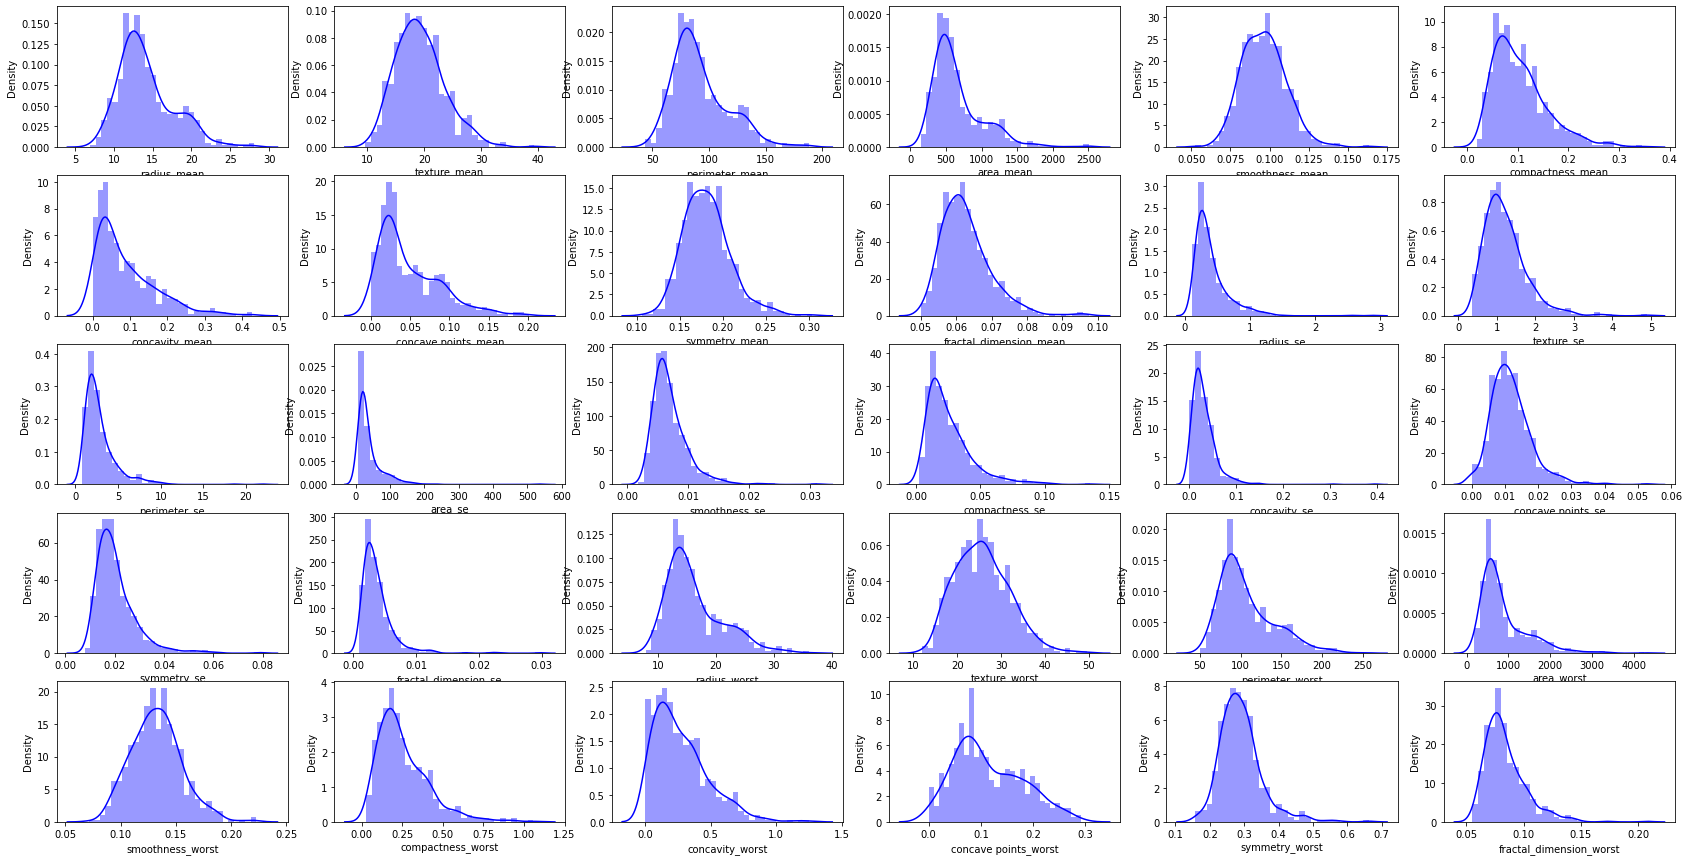

In [ ]:

fig, axs = plt.subplots(5,6, figsize = (29,15))
c = 0
r = 0
for col in list(data.columns):
    if col != 'diagnosis':
        sns.distplot(data[col], kde = True, color ='blue', bins = 30, ax=axs[c, r])
        r += 1
        if r == 6:
            c += 1
            r = 0 

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In ' area_mean', 'radius_se', 'perimeter_se', 'area_worst', concavity_se, 'smoothness_se' and 'area_se' may be outlier present.

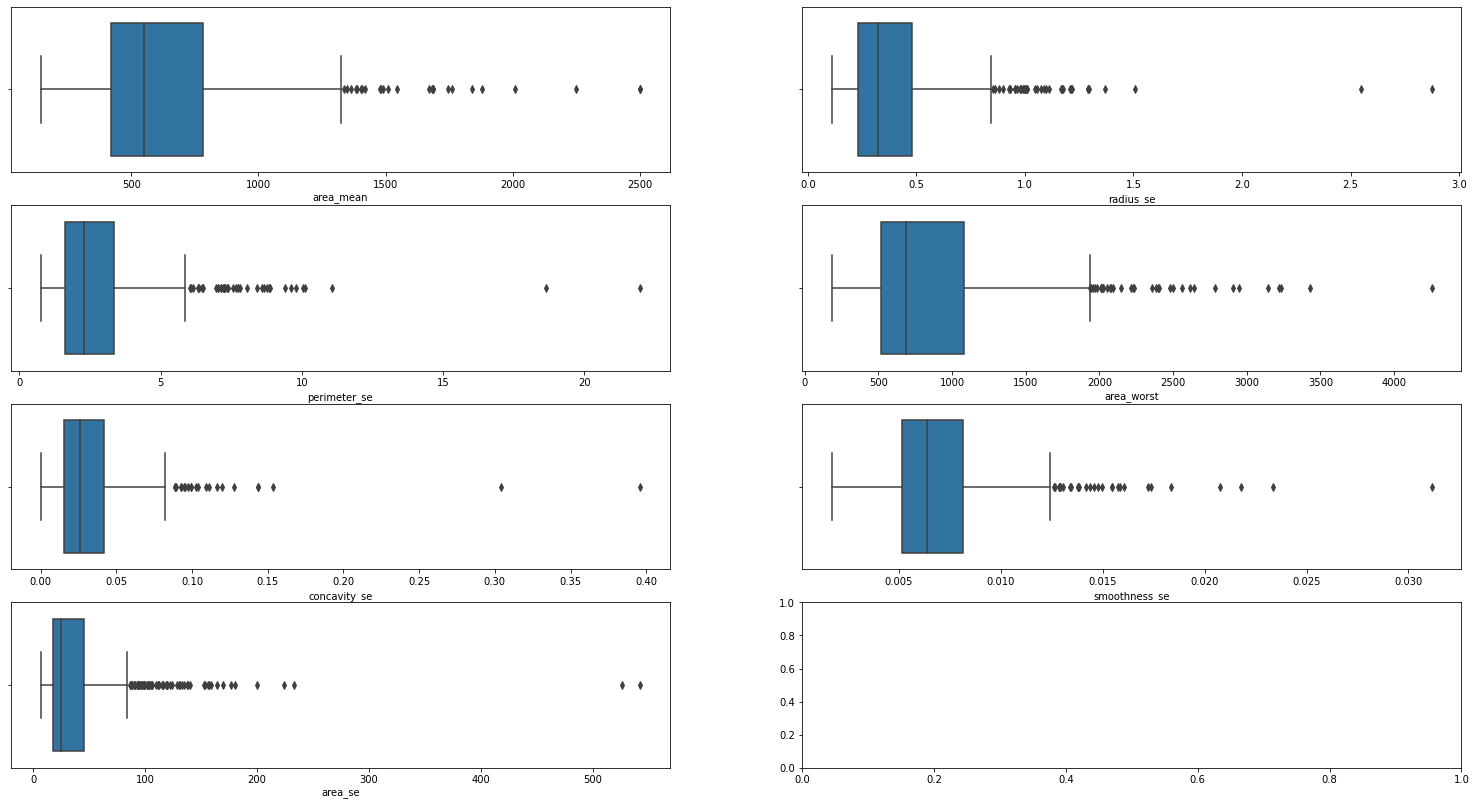

In [ ]:
fig, axs = plt.subplots(4,2, figsize = (26,14))
plt1 = sns.boxplot(data['area_mean'], ax = axs[0,0])
plt2 = sns.boxplot(data['radius_se'], ax = axs[0,1])
plt3 = sns.boxplot(data['perimeter_se'], ax = axs[1,0])
plt4 = sns.boxplot(data['area_worst'], ax = axs[1,1])
plt5 = sns.boxplot(data['concavity_se'], ax = axs[2,0])
plt6 = sns.boxplot(data['smoothness_se'], ax = axs[2,1])
plt7 = sns.boxplot(data['area_se'], ax = axs[3,0])

 Conclusion: 
 1. there are mainy outlier present in the  ' area_mean', 'radius_se', 'perimeter_se', 'area_worst', concavity_se, 'smoothness_se' and 'area_se'

 2. All outlier are Upper outer fence


## Outlier Treatment

1. radius_se

In [ ]:
 
Q3 = data.radius_se.quantile(0.75)          # 75 Quantile radius_se data   
Q1 = data.radius_se.quantile(0.25)          # 25 Quantile radius_se data

IQR = Q3 - Q1                           # Inter Quartile range
outerFence = Q3 + 1.5*IQR
# data[(data.radius_se > outerFence)]                 # print all the radius_se outlier

# Q3 + (1.5*(Q3-Q1))

In [ ]:
# Replacing all the outlier with outerFence
data.radius_se[(data.radius_se > outerFence)] = outerFence

2. area_mean

In [ ]:
Q3 = data.area_mean.quantile(0.75)          # 75 Quantile area_mean data   
Q1 = data.area_mean.quantile(0.25)          # 25 Quantile area_mean data

IQR = Q3 - Q1                           # Inter Quartile range = Q3 - Q1
outerFence = Q3 + 1.5*IQR
# data[(data.area_mean > outerFence)]                 # print all the area_mean outlier

# Q3 + (1.5*(Q3-Q1))

In [ ]:
# Replacing all the outlier with Upper outerFence
data.area_mean[(data.area_mean > outerFence)] = outerFence

3. perimeter_se

In [ ]:
Q3 = data.perimeter_se.quantile(0.75)          # 75 Quantile perimeter_se data   
Q1 = data.perimeter_se.quantile(0.25)          # 25 Quantile perimeter_se data

IQR = Q3 - Q1                           # Inter Quartile range = Q3 - Q1
outerFence = Q3 + 1.5*IQR
# data[(data.perimeter_se > outerFence)]                 # print all the perimeter_se outlier

# Q3 + (1.5*(Q3-Q1))

In [ ]:
data.perimeter_se[(data.perimeter_se > outerFence)] = outerFence

4. area_worst

In [ ]:
Q3 = data.area_worst.quantile(0.75)          # 75 Quantile area_worst data   
Q1 = data.area_worst.quantile(0.25)          # 25 Quantile area_worst data

IQR = Q3 - Q1                           # Inter Quartile range = Q3 - Q1
outerFence = Q3 + 1.5*IQR
# data[(data.area_worst > outerFence)]                 # print all the area_worst outlier

# Q3 + (1.5*(Q3-Q1))

In [ ]:
data.area_worst[(data.area_worst > outerFence)] = outerFence

5.  concavity_se

In [ ]:
Q3 = data.concavity_se.quantile(0.75)          # 75 Quantile concavity_se data   
Q1 = data.concavity_se.quantile(0.25)          # 25 Quantile concavity_se data

IQR = Q3 - Q1                           # Inter Quartile range = Q3 - Q1
outerFence = Q3 + 1.5*IQR
# data[(data.concavity_se > outerFence)]                 # print all the concavity_se outlier

# Q3 + (1.5*(Q3-Q1))

In [ ]:
data.concavity_se[(data.concavity_se > outerFence)] = outerFence

6. smoothness_se

In [ ]:
Q3 = data.smoothness_se.quantile(0.75)          # 75 Quantile smoothness_se data   
Q1 = data.smoothness_se.quantile(0.25)          # 25 Quantile smoothness_se data

IQR = Q3 - Q1                           # Inter Quartile range = Q3 - Q1
outerFence = Q3 + 1.5*IQR
# data[(data.smoothness_se > outerFence)]                 # print all the smoothness_se outlier

# Q3 + (1.5*(Q3-Q1))

In [ ]:
data.smoothness_se[(data.smoothness_se > outerFence)] = outerFence

7. area_se

In [ ]:
Q3 = data.area_se.quantile(0.75)          # 75 Quantile area_se data   
Q1 = data.area_se.quantile(0.25)          # 25 Quantile area_se data

IQR = Q3 - Q1                           # Inter Quartile range = Q3 - Q1
outerFence = Q3 + 1.5*IQR
# data[(data.area_se > outerFence)]                 # print all the area_se outlier

# Q3 + (1.5*(Q3-Q1))

In [ ]:
data.area_se[(data.area_se > outerFence)] = outerFence

After removing all the outlier

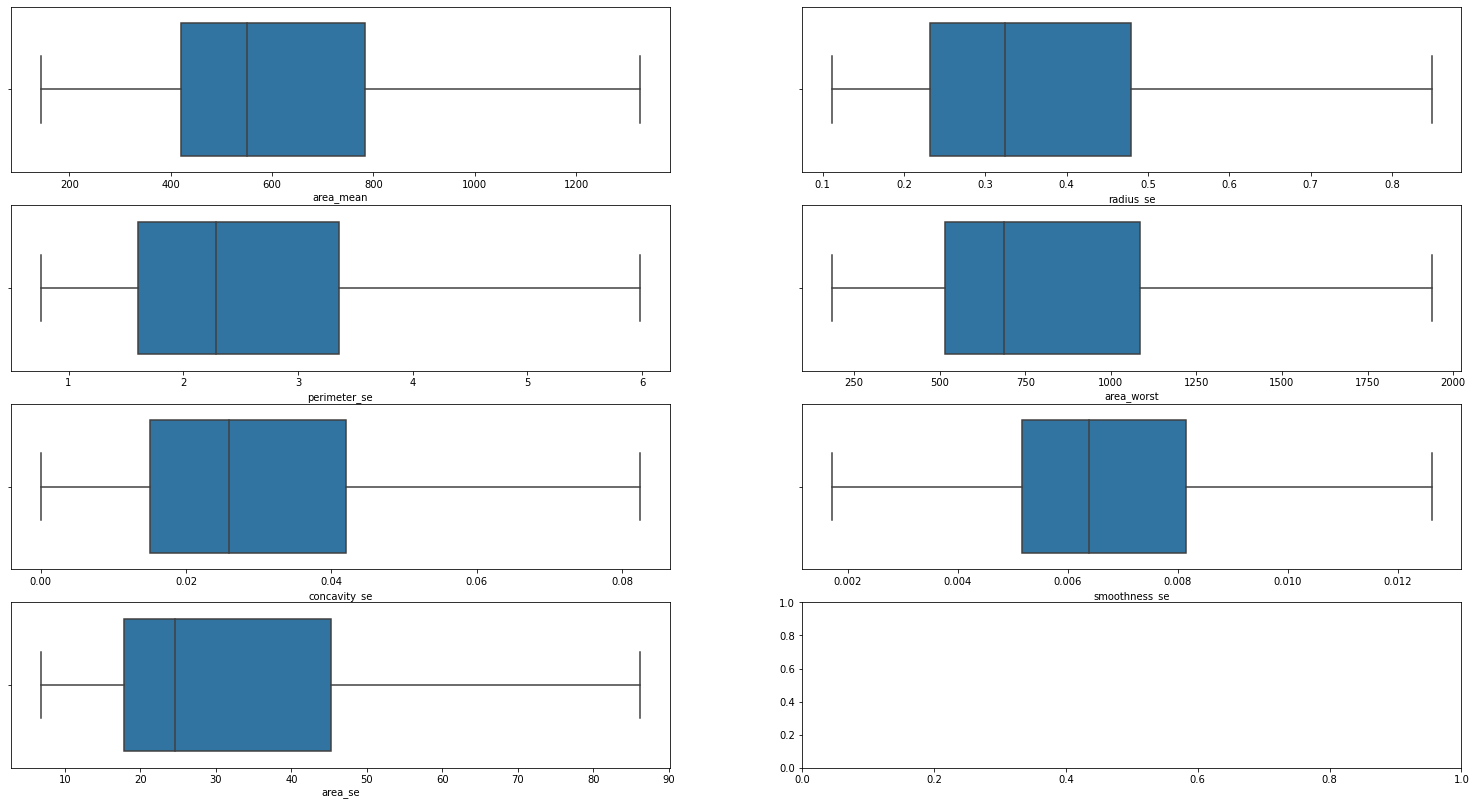

In [ ]:
fig, axs = plt.subplots(4,2, figsize = (26,14))
plt1 = sns.boxplot(data['area_mean'], ax = axs[0,0])
plt2 = sns.boxplot(data['radius_se'], ax = axs[0,1])
plt3 = sns.boxplot(data['perimeter_se'], ax = axs[1,0])
plt4 = sns.boxplot(data['area_worst'], ax = axs[1,1])
plt5 = sns.boxplot(data['concavity_se'], ax = axs[2,0])
plt6 = sns.boxplot(data['smoothness_se'], ax = axs[2,1])
plt7 = sns.boxplot(data['area_se'], ax = axs[3,0])

Shape of Malingant :  (212, 31)

Shape of Bengin :  (357, 31)


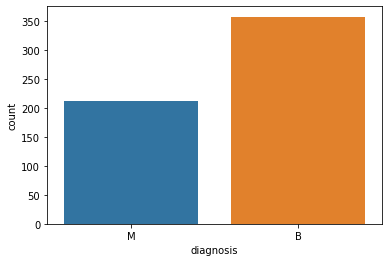

In [ ]:
Malingant = data[data['diagnosis']=='M']
Bengin = data[data['diagnosis']=='B']

print('Shape of Malingant : ', Malingant.shape)
print('\nShape of Bengin : ', Bengin.shape)

sns.countplot(data=data, x = 'diagnosis',label='Count')

conclusion: dataset contain approx 40% Malingant and approx 60% Bengin <br>
    **This is not imbalanced dataset**

Label Encoding of 'diagnosis' column

In [ ]:

label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# After Label encoding
# M: 1, B: 0
data.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
315,0,12.490,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,0.17160,0.7151,1.047,12.69,0.004928,0.003012,0.00262,0.003390,0.01393,0.001344,13.34,19.71,84.48,544.2,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174
415,0,11.890,21.17,76.39,433.8,0.09773,0.08120,0.025550,0.021790,0.2019,0.06290,0.27470,1.2030,1.930,19.53,0.009895,0.030530,0.01630,0.009276,0.02258,0.002272,13.05,27.21,85.09,522.9,0.1426,0.21870,0.11640,0.08263,0.3075,0.07351
27,1,18.610,20.25,122.10,1094.0,0.09440,0.10660,0.149000,0.077310,0.1697,0.05699,0.84865,1.8490,5.632,86.20,0.010750,0.027220,0.05081,0.019110,0.02293,0.004217,21.31,27.26,139.90,1403.0,0.1338,0.21170,0.34460,0.14900,0.2341,0.07421
103,0,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.030290,0.1945,0.06322,0.18030,1.2220,1.528,11.77,0.009058,0.021960,0.03029,0.011120,0.01609,0.003570,10.76,26.83,72.22,361.2,0.1559,0.23020,0.26440,0.09749,0.2622,0.08490
33,1,19.270,26.47,127.90,1162.0,0.09401,0.17190,0.165700,0.075930,0.1853,0.06261,0.55580,0.6062,3.528,68.17,0.005015,0.033180,0.03497,0.009643,0.01543,0.003896,24.15,30.90,161.40,1813.0,0.1509,0.65900,0.60910,0.17850,0.3672,0.11230


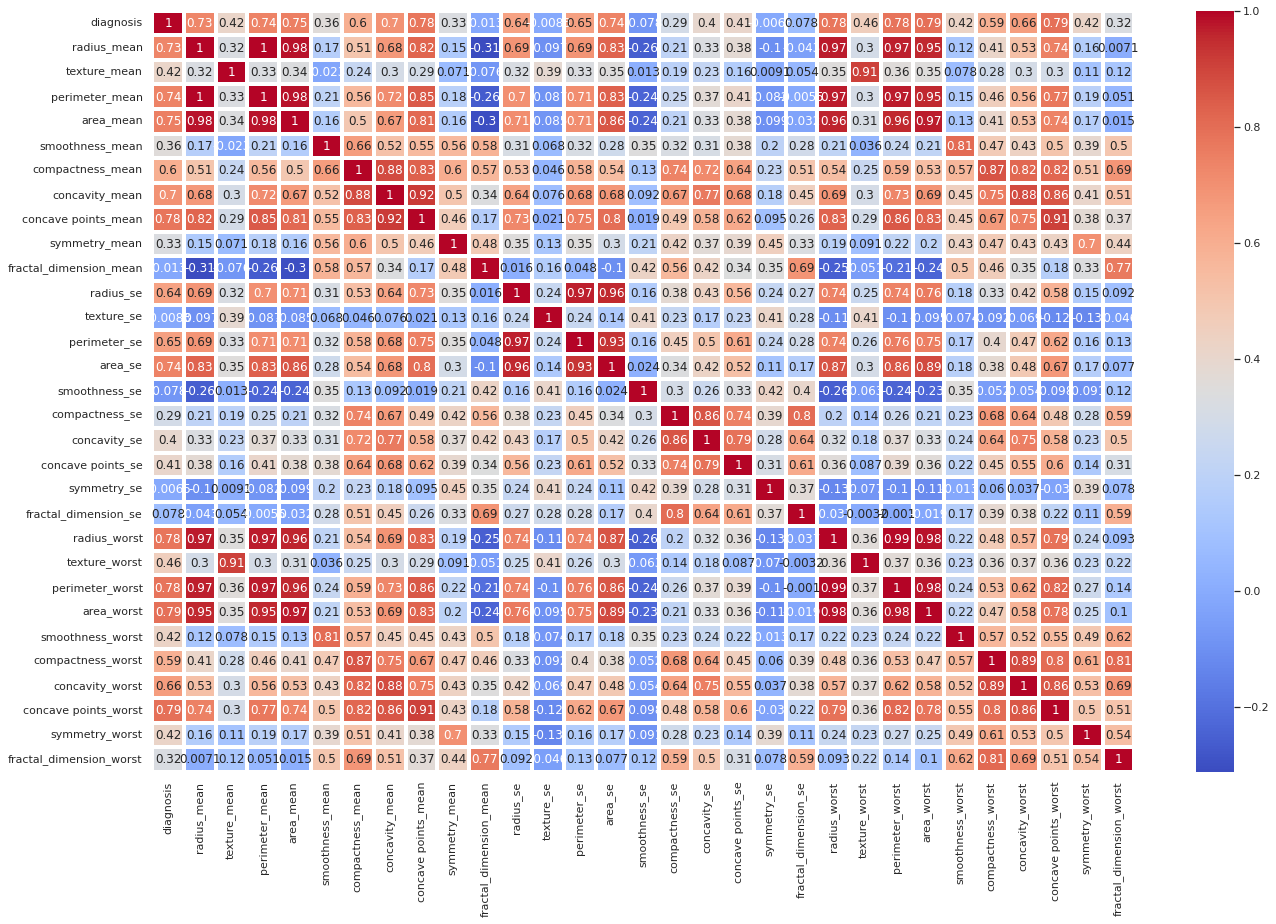

In [ ]:
sns.set(rc={'figure.figsize':(22, 14)})

# Correlation Heatmap
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, linewidths=3)

**Conclusion**
1. Correlation between radius_mean and perimeter_mean is 1
2. Correlation between area_mean and radius_mean is 0.98
3. Correlation between radius_mean and radius_worst is 0.98
4. Correlation between area_worst and area_mean is 0.97
5. Correlation between perimeter_worst and radius_mean is 0.95
6. Correlation between perimeter_worst and area_mean is 0.96
7. Correlation between area_worst and radius_mean is 0.95
8. Correlation between radius_worst and area_mean is 0.96

In [ ]:
# droping Perimeter_mean, radius_worst 
data.drop(['perimeter_mean', 'radius_worst'], axis=1, inplace=True)
# After droping Perimeter_mean, radius_worst
data.sample(5)

,diagnosis,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
533,1,20.470,20.67,1299.0,0.09156,0.13130,0.1523,0.10150,0.2166,0.05419,0.8336,1.7360,5.168,86.20,0.004938,0.030890,0.04093,0.01699,0.02816,0.002719,27.15,152.00,1645.0,0.1097,0.25340,0.3092,0.1613,0.3220,0.06386
72,1,17.200,24.52,929.4,0.10710,0.18300,0.1692,0.07944,0.1927,0.06487,0.5907,1.0410,3.705,69.47,0.005820,0.056160,0.04252,0.01127,0.01527,0.006299,33.82,151.60,1681.0,0.1585,0.73940,0.6566,0.1899,0.3313,0.13390
175,0,8.671,14.45,227.2,0.09138,0.04276,0.0000,0.00000,0.1722,0.06724,0.2204,0.7873,1.435,11.36,0.009172,0.008007,0.00000,0.00000,0.02711,0.003399,17.04,58.36,259.2,0.1162,0.07057,0.0000,0.0000,0.2592,0.07848
465,0,13.240,20.13,542.9,0.08284,0.12230,0.1010,0.02833,0.1601,0.06432,0.2810,0.8135,3.369,23.81,0.004929,0.066570,0.07683,0.01368,0.01526,0.008133,25.50,115.00,733.5,0.1201,0.56460,0.6556,0.1357,0.2845,0.12490
328,1,16.270,20.71,813.7,0.11690,0.13190,0.1478,0.08488,0.1948,0.06277,0.4375,1.2320,3.270,44.41,0.006697,0.020830,0.03248,0.01392,0.01536,0.002789,30.38,129.80,1121.0,0.1590,0.29470,0.3597,0.1583,0.3103,0.08200


In [ ]:
data.describe()

,diagnosis,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,639.765202,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.384698,1.216853,2.699075,34.959487,0.006876,0.025478,0.030038,0.011796,0.020542,0.003795,25.677223,107.261213,849.907821,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,305.343508,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.203612,0.551648,1.402982,24.294515,0.002410,0.017908,0.020577,0.006170,0.008266,0.002646,6.146258,33.602542,475.645240,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,1326.300000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,0.848650,4.885000,5.983500,86.200000,0.012611,0.135400,0.082490,0.052790,0.078950,0.029840,49.540000,251.200000,1937.050000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# save dataset as UpdatedDataset.csv
data.to_csv('UpdatedDataset.csv', index=None)
data.shape

(569, 29)